# Time Series Fundamentals

## 1. What is a Time Series?
A **time series** is a sequence of data points collected, recorded, or observed **over time at regular intervals** (e.g., seconds, minutes, days, months, or years).  

It is used to identify patterns, trends, and cycles within data to help with forecasting future events. 

Unlike regular datasets where the order of observations may not matter, **the order of time series data is critical** because each observation is dependent on time.

### Examples
- Daily stock market prices of Bitcoin (2014–present)
- Monthly sales revenue of a retail store
- Hourly temperature readings of a weather station
- Yearly population growth in a city

### Key Characteristics of Time Series Data
- **Chronological Order**: Data points are ordered by time, with each observation being dependent on those that came before it. 
- **Temporal Dependencies**: Unlike traditional datasets, time series data points are not independent; the value of one point can influence the next. 
- **Time Intervals**: Data is collected at specific intervals, which can be regular (e.g., daily, hourly) or irregular. 

## 2. Components of a Time Series
A time series is made up of four main components that describe its patterns:

1. **Trend (T)**  
   - The long-term direction of the data (upward, downward, or flat).  
   - Shows overall growth or decline.  
   - Example: steady increase in global temperatures.

2. **Seasonality (S)**  
   - Regular, repeating patterns at fixed intervals (daily, monthly, yearly).  
   - Caused by seasons, holidays, or human behavior.  
   - Example: higher ice cream sales every summer.

3. **Cyclic (C)**  
   - Long-term fluctuations around the trend with no fixed period.  
   - Linked to economic or business cycles.  
   - Example: multi-year economic booms and recessions.

4. **Irregular/Random (R)**  
   - Unpredictable variations caused by unexpected events (noise).  
   - Example: sudden sales drop from a natural disaster. 

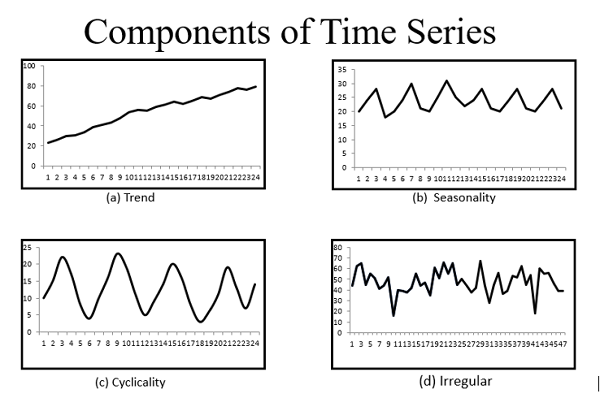


### Time Series Analysis
This is the process of analyzing time-ordered data to extract meaningful insights and patterns. The goal of time series analysis is to: 
1. **Build a Model**: Create a model that represents the underlying patterns (trends, cycles, seasonality) within the data. 
2. **Forecast Future Values**: Use the model to predict future outcomes, such as sales figures or resource needs. 
3. **Understand Behavior**: Gain insights into how a system changes and what drives these changes over time. 

### 3. Types of Time Series
Time series can be classified based on:
1. **Number of variables measured** (Univariate vs. Multivariate)  
2. **Regularity of observation intervals** (Regular vs. Irregular)  
3. **Nature of the data** (Continuous vs. Discrete)

#### By the number of variables 
- **Univariate Time Series**: Involves the analysis of a single series of data to understand trends and patterns within that one variable. e.g  Monthly rainfall amounts in Nairobi. Daily closing price of Bitcoin over a year.
- **Multivariate Time Series**: Involves the analysis of several related series of data to understand the relationships between them and make predictions. e.g Weather forecasting using temperature, humidity, and wind speed recorded together.e.g Hourly temperature readings, Daily stock market closing prices

#### By the interval of observation
- **Regular Time Series**: Data is collected at fixed, consistent time intervals, such as hourly temperature readings or daily sales figures.
- **Irregular Time Series**: Data is collected at inconsistent or irregular time intervals. Forecasting is generally more suited to regular time series data, where past events can more effectively indicate future trends. e.g Records of earthquakes (events occur unpredictably)

#### By the nature of the data 
- **Continuous Time Series**: Data is collected continuously over time without gaps, like the real-time performance of a machine.
- **Discrete Time Series**: Data is recorded at specific, separated points in time, such as monthly financial reports or annual GDP growth rates.

### 7. Applications of Time Series
Time series analysis is widely used in various fields:
- Finance: Stock price prediction, cryptocurrency forecasting.
- Business: Demand forecasting, inventory management.
- Weather: Temperature, rainfall, and climate predictions.
- Healthcare: Disease outbreak prediction, patient monitoring.
- Transportation: Traffic flow forecasting, ride-hailing demand.
- Energy: Electricity load forecasting.


## Basic Terminology & Concepts in Time Series

Before moving on to modeling or forecasting, it’s important to understand a few core concepts.  
These ideas help explain how past values influence future ones and guide decisions about preprocessing and model selection.

### Lag
A **lag** is the time gap between an observation and a previous observation.  
For example:
- Daily temperature: Comparing today’s temperature with yesterday’s is a `lag-1` relationship.
- Stock price: Comparing today’s price with the price two days ago is a `lag-2` relationship.

Lags allow us to measure how past events affect current values.

### Autocorrelation
Autocorrelation measures how strongly a time series relates to its past values across different lags.  
- High autocorrelation at `lag-1` means today’s value is strongly related to yesterday’s value.
- Significant correlations at higher lags can indicate **seasonality** (e.g., weekly or yearly cycles).

Strong autocorrelation often signals patterns such as **trend** or **seasonality**, while a rapid drop toward zero suggests more random behavior.

### ACF (Autocorrelation Function)
The **ACF** shows autocorrelation across multiple lags in a single plot.  
- The x-axis represents lag numbers (1, 2, 3, …).  
- The y-axis shows the strength of the correlation at each lag.  
- Bars extending beyond the significance bounds indicate meaningful relationships.

The `correlation coefficient` is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables.

The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

**Uses**:
- Detecting **seasonality**: Repeated peaks at regular lags reveal recurring cycles.
- Identifying how many lagged terms to include in models such as ARIMA.


### PACF (Partial Autocorrelation Function)
The **PACF** measures the `direct` correlation between the series and a specific lag while removing the influence of intermediate lags.  

#### Why “Direct” Matters

Imagine you’re checking if today’s sales are related to sales two days ago (lag-2).

But sales from yesterday (lag-1) might already explain most of the connection:
    - If yesterday’s sales are high, today’s sales might also be high.
    - And if two days ago sales influence yesterday’s sales, you’ll automatically see some correlation between today and two days ago.

The `PACF` removes the “middleman” (lag-1) effect.

It shows how much two days ago influences today over and above what yesterday already explains.

- Useful for determining the order of the **autoregressive (AR)** component in ARIMA models.
- For example, if PACF cuts off after lag-2, it suggests the current value directly depends on the previous two observations.

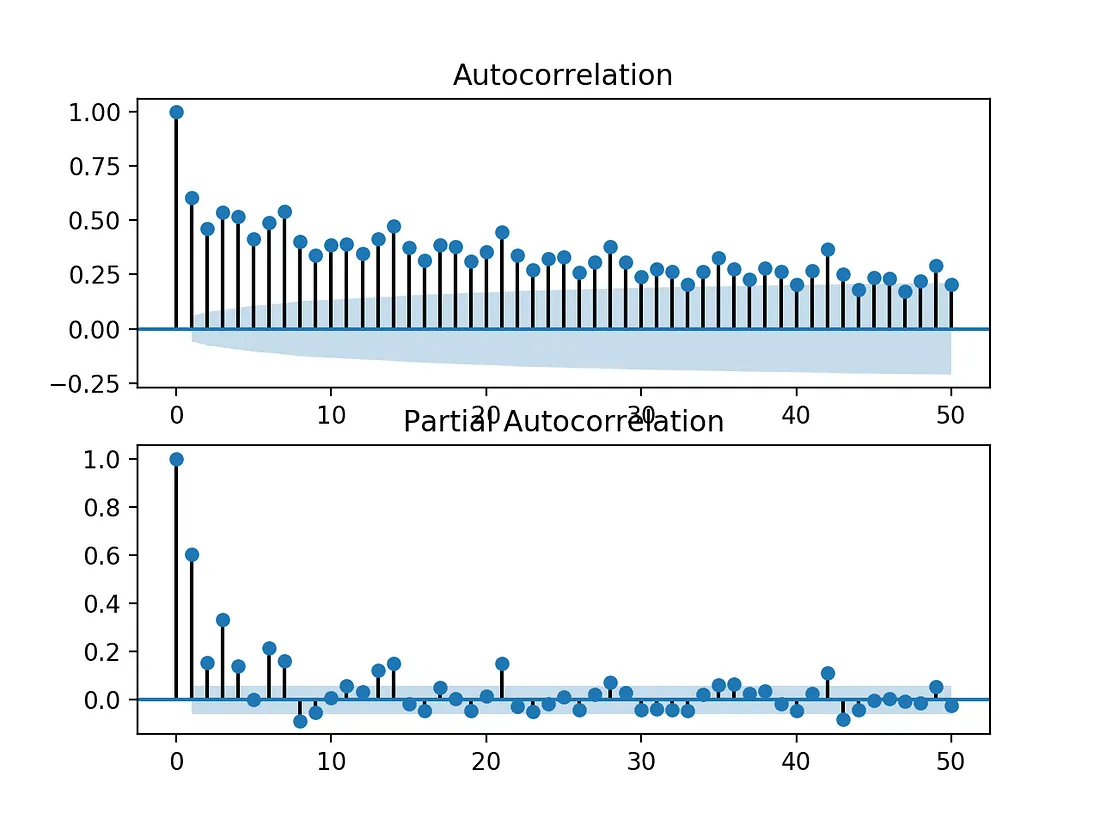

### White Noise
White noise is a purely random series with no predictable pattern.  
It has a constant mean, constant variance, and near-zero autocorrelation at all lags.  
If a series behaves like white noise, no forecasting model can reliably predict future values.

### Stationarity
A series is **stationary** when its statistical properties such as mean, variance, and correlation structure remain constant over time.  
Stationarity is critical because many forecasting models (e.g., ARIMA) assume the underlying data does not drift or change in variability.

#### Signs of Non-Stationarity
- Upward or downward **trend** in the time plot.
- Changing **variance** (values spread wider or narrower over time).
- Slowly decaying autocorrelations in the ACF plot.

#### How to Check Stationarity
1. **Visual inspection** – Plot the series to spot trends or changing spread.  
2. **Rolling statistics** – Compare rolling mean and variance; they should remain roughly constant.  
3. **Statistical tests**:
   - **Augmented Dickey–Fuller (ADF)**:
     - Null hypothesis: the series is non-stationary.
     - p-value < 0.05 → reject the null → series is likely stationary.
   - **KPSS test** ((Kwiatkowski–Phillips–Schmidt–Shin))
     - Null hypothesis: the series is stationary.
     - p-value < 0.05 → reject the null → series is likely non-stationary.

#### Making a Series Stationary
- **Differencing**: Subtract the previous value to remove trend.  
- **Transformations**: Apply log, square root, or Box–Cox to stabilize variance.  
- **Seasonal differencing**: Remove repeating seasonal effects.

### Why These Concepts Matter
Understanding lags, autocorrelation, ACF, PACF, and stationarity enables you to:
- Detect meaningful patterns before modeling.
- Choose the right lag order for ARIMA or similar models.
- Apply transformations to meet model assumptions and improve forecast accuracy.


## Time Series Models

Time series models describe how current values relate to past observations or past forecast errors.  
They help identify patterns and make forecasts. The most common classical models are **AR**, **MA**, **ARMA**, and **ARIMA**.

### 1. Autoregressive (AR) Model
- Predicts future values based on linear combinations of `past values` of the same time series.
- **Order (p)**:  
  - *p* = the number of **past observations (lags)** included in the model.  
  - Example: AR(2) means today’s value depends on **yesterday (lag 1)** and **the day before (lag 2)**.

### 2. Moving Average (MA) Model
- The current value depends on **past forecast errors (shocks)**, not past observations.
- **Order (q)**:
- *q* = the number of **past errors (lagged residuals)** used to predict the current value.
- Example: MA(1) means today’s value depends on **yesterday’s forecast error**.

### 3. ARMA Model
- Combines **AR(p)** and **MA(q)** to model both:
- Dependence on **past values** (AR part),
- Dependence on **past errors** (MA part).
- **Requirement**: The data must be **stationary** (constant mean and variance).
- **Example**: Daily stock returns that show short-term dependence and random shocks → ARMA(1,1).

### 4. ARIMA Model
- Extends ARMA to handle **non-stationary data** by differencing.
- **Parameters (p, d, q)**:
- **p**: AR order (number of past observations to include).
- **d**: Differencing order (number of times to subtract consecutive observations to remove trend or make the series stationary).
- **q**: MA order (number of past forecast errors to include).

- **How to Choose Parameters**:
1. **d** (Differencing):
   - Check stationarity using plots or the **ADF test**.
   - Apply differencing until mean/variance are stable (avoid over-differencing).
2. **p** (AR order):
   - From the **PACF plot**, look for the lag where PACF sharply cuts off.
3. **q** (MA order):
   - From the **ACF plot**, look for the lag where ACF sharply cuts off.

- **Example**:
- Monthly sales show an upward trend.

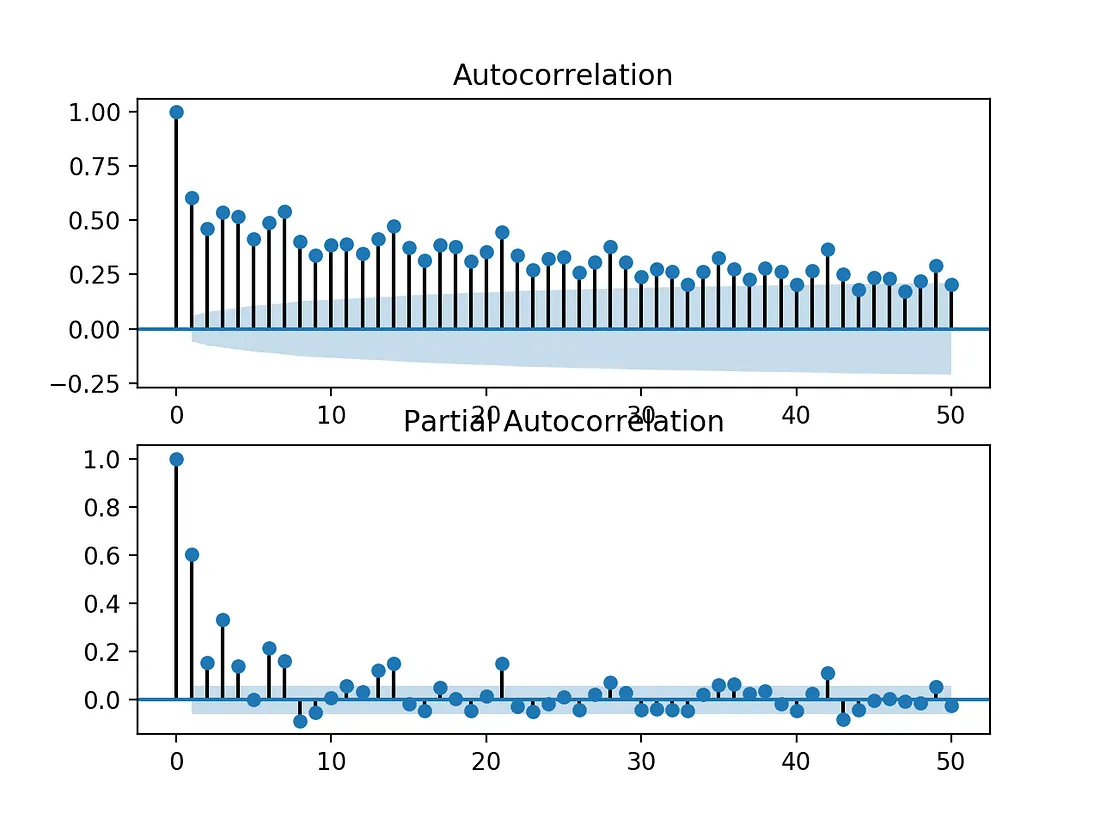

### Choosing ARIMA Parameters from ACF/PACF

From the given plots:

#### ACF (Top Plot)
- Shows correlation with past values.
- **Pattern**: Slow, gradual decay (no sharp cutoff).
- **Meaning**: Indicates an **AR process** rather than a pure MA process.
- **q (MA order)**: Likely **0** or very small.

#### PACF (Bottom Plot)
- Shows direct correlation with lags after removing intermediate effects.
- **Pattern**: Significant spikes up to **lag 2**, then drops within the confidence bands.
- **Meaning**: Suggests **AR order p ≈ 2**.

#### Differencing (d)
- If the original series had trend (non-stationary), first differencing was probably applied.
- **d ≈ 1** is typical to achieve stationarity.

#### Suggested Model
- **ARIMA(2,1,0)**
  - **p = 2**: Two past observations used.
  - **d = 1**: First differencing for stationarity.
  - **q = 0**: No significant MA component.

*Next Step*: Fit ARIMA(2,1,0) and check residuals. If autocorrelation remains, try small adjustments such as ARIMA(2,1,1).

### 5. Seasonal ARIMA (SARIMA)
- Extends ARIMA to handle **seasonal** patterns.
- **Parameters**: (p, d, q) × (P, D, Q, s)
- P, D, Q = seasonal AR, differencing, and MA terms.
- s = length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).
- **Example**: Forecasting monthly airline passengers with yearly peaks.
